# p30: Spectral integration, ODE style

Compare to p12

In [14]:
%config InlineBackend.figure_format='svg'
from numpy import zeros,abs,dot,exp,sqrt,pi
from scipy.special import erf
from numpy.linalg import inv
from chebPy import cheb
from matplotlib.pyplot import figure,subplot,semilogy,grid,xlim,ylim,xlabel,ylabel,text

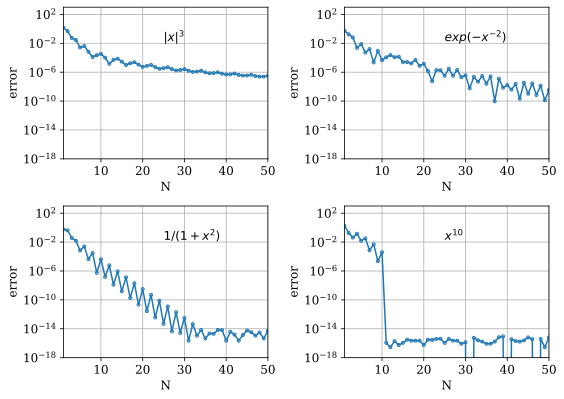

In [15]:
Nmax = 50; E = zeros((4,Nmax+1))
for N in range(1,Nmax+1):
    D, x = cheb(N)
    x = x[1:]; Di = inv(D[1:,1:]); w = Di[-1,:]
    f = abs(x)**3;             E[0,N] = abs(dot(w,f)-0.5)
    f = exp(-(x+1e-20)**(-2)); E[1,N] = abs(dot(w,f) - 2*(exp(-1)+sqrt(pi)*(erf(1)-1)))
    f = 1/(1+x**2);            E[2,N] = abs(dot(w,f) - pi/2)
    f = x**10;                 E[3,N] = abs(dot(w,f) - 2.0/11.0)

labels = ('$|x|^3$', '$exp(-x^{-2})$', '$1/(1+x^2)$', '$x^{10}$')
figure(figsize=(8,8))
for iplot in range(4):
    subplot(3,2,iplot+1)
    semilogy(range(1,Nmax+1), E[iplot,1:]+1e-100, '.-')
    xlabel('N'); ylabel('error'); xlim(1,Nmax); ylim(1e-18,1e3); grid(True)
    text(25,0.02,labels[iplot])

## Repeat with Clenshaw-Curtis

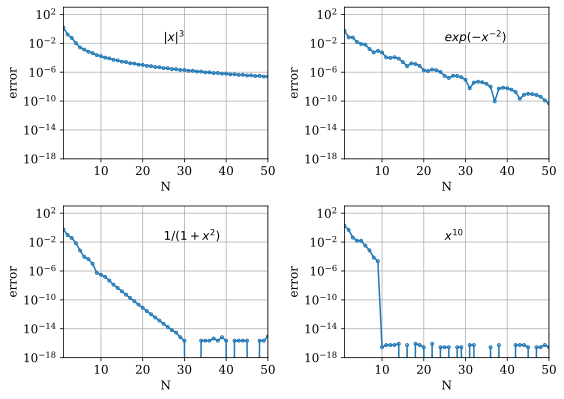

In [16]:
from clencurt import *
Nmax = 50; E = zeros((4,Nmax+1))
for N in range(1,Nmax+1):
    x,w = clencurt(N)
    f = abs(x)**3;             E[0,N] = abs(dot(w,f)-0.5)
    f = exp(-(x+1e-20)**(-2)); E[1,N] = abs(dot(w,f) - 2*(exp(-1)+sqrt(pi)*(erf(1)-1)))
    f = 1/(1+x**2);            E[2,N] = abs(dot(w,f) - pi/2)
    f = x**10;                 E[3,N] = abs(dot(w,f) - 2.0/11.0)

labels = ('$|x|^3$', '$exp(-x^{-2})$', '$1/(1+x^2)$', '$x^{10}$')
figure(figsize=(8,8))
for iplot in range(4):
    subplot(3,2,iplot+1)
    semilogy(range(1,Nmax+1), E[iplot,1:]+1e-100, '.-')
    xlabel('N'); ylabel('error'); xlim(1,Nmax); ylim(1e-18,1e3); grid(True)
    text(25,0.02,labels[iplot])